# Maybank2u SG (Lite) Review Analysis (Google Play & App Store)

In [1]:
# import packages
import pandas as pd
from google_play_scraper import app, reviews
from app_store_scraper import AppStore
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# To see full review in each row, uncomment this line below
#pd.set_option('display.max_colwidth', None)

## Scraping Google Play Data

In [2]:
# Initial count of reviews to fetch
count = 196

# Initialize rows and cols
rows, cols = 0, 0

# Loop to fetch reviews until the DataFrame is not empty or count reaches 0
while rows == 0 and count > 0:
    result, continuation_token = reviews(
        'sg.maybank.mae',
        lang='en',
        country='us',
        count=count
    )
    
    mb_ggplay_df = pd.DataFrame(result)
    rows, cols = mb_ggplay_df.shape
    
    if rows == 0:
        count -= 1

print(f"Number of reviews fetched: {rows}")

# Optionally drop columns if needed
if rows > 0:
    mb_ggplay_df = mb_ggplay_df.drop(['reviewId', 'userImage'], axis=1)
else:
    print("Failed to fetch reviews")
    
mb_ggplay_df.head()

Number of reviews fetched: 196


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,Adilla,Everything is just bad!,1,0,5.8,2024-07-14 03:18:43,None,None,5.8
1,Hassan Ibrahim,Easy n faster for transfer,5,0,5.8,2024-07-13 20:18:53,None,None,5.8
2,Quek Lye Choon,It's so very confusing to download,2,0,5.8,2024-07-13 18:18:22,None,None,5.8
3,Mendy Ham,"Cannot access, why is the app block access due...",1,0,5.7,2024-07-13 12:26:51,None,None,5.7
4,muhdyfaaz yus,Unable to connect to internet . Even though fu...,1,0,5.8,2024-07-11 13:44:34,None,None,5.8


## Scraping App Store Data

In [3]:
count = 49 # number of reviews to fetch

mb_appstore = AppStore(country="sg", app_name="Maybank2u SG (Lite)")
mb_appstore.review(how_many=count)
mb_appstore_df = pd.DataFrame(mb_appstore.reviews)
rows, cols = mb_appstore_df.shape
print(f"Number of reviews fetched: {rows}")
mb_appstore_df.head()

2024-07-18 15:42:40,173 [INFO] Base - Searching for app id
2024-07-18 15:42:41,477 [INFO] Base - Initialised: AppStore('sg', 'maybank2u-sg-lite-', 1574139300)
2024-07-18 15:42:41,480 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sg/app/maybank2u-sg-lite-/id1574139300
2024-07-18 15:42:42,281 [INFO] Base - [id:1574139300] Fetched 49 reviews (49 fetched in total)


Number of reviews fetched: 49


,date,review,rating,isEdited,userName,title
0,2024-04-13 15:56:53,I do not want this APP to be able to access my...,2,False,aezjnn,Do not allow access to Contacts
1,2023-12-17 01:55:36,Why makes things complicating when the usage o...,1,False,jajz5678,Bad set up and UX
2,2022-01-20 13:26:50,Finally a new mobile banking app is out to tak...,5,False,Jttc14,Something new and something better for the new...
3,2024-03-04 11:30:38,Why does payment limit always at a max of 1000...,2,False,superkaly,Lousy app and settings
4,2024-06-19 13:57:57,This lite version app is too functionless. I c...,2,False,lijunsiyuan,Too lite


In [4]:
# Combine them together:
mb_ggplay_df['platform'] = 'Google Play'
mb_appstore_df['platform'] = 'App Store'
mb_appstore_df['content'] = mb_appstore_df['title'] + ' , ' + mb_appstore_df['review']
mb_appstore_df = mb_appstore_df.rename(columns = {'date':'at','rating':'score'})
mb_appstore_df = mb_appstore_df[['at','score','userName','platform','content']]
mb_df = pd.concat([mb_ggplay_df, mb_appstore_df], axis=0, ignore_index=True)

## Full data

In [5]:
mb_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,platform
0,Adilla,Everything is just bad!,1,0.0,5.8,2024-07-14 03:18:43,None,None,5.8,Google Play
1,Hassan Ibrahim,Easy n faster for transfer,5,0.0,5.8,2024-07-13 20:18:53,None,None,5.8,Google Play
2,Quek Lye Choon,It's so very confusing to download,2,0.0,5.8,2024-07-13 18:18:22,None,None,5.8,Google Play
3,Mendy Ham,"Cannot access, why is the app block access due...",1,0.0,5.7,2024-07-13 12:26:51,None,None,5.7,Google Play
4,muhdyfaaz yus,Unable to connect to internet . Even though fu...,1,0.0,5.8,2024-07-11 13:44:34,None,None,5.8,Google Play


## Only Google Play data

In [6]:
mb_ggplay_df = mb_df[mb_df['platform'] == 'Google Play']

In [7]:
mb_ggplay_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,platform
0,Adilla,Everything is just bad!,1,0.0,5.8,2024-07-14 03:18:43,None,None,5.8,Google Play
1,Hassan Ibrahim,Easy n faster for transfer,5,0.0,5.8,2024-07-13 20:18:53,None,None,5.8,Google Play
2,Quek Lye Choon,It's so very confusing to download,2,0.0,5.8,2024-07-13 18:18:22,None,None,5.8,Google Play
3,Mendy Ham,"Cannot access, why is the app block access due...",1,0.0,5.7,2024-07-13 12:26:51,None,None,5.7,Google Play
4,muhdyfaaz yus,Unable to connect to internet . Even though fu...,1,0.0,5.8,2024-07-11 13:44:34,None,None,5.8,Google Play


## Only App Store data

In [8]:
mb_appstore_df = mb_df[mb_df['platform'] == 'App Store']
mb_appstore_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,platform
196,aezjnn,"Do not allow access to Contacts , I do not wan...",2,NaN,NaN,2024-04-13 15:56:53,NaN,NaN,NaN,App Store
197,jajz5678,"Bad set up and UX , Why makes things complicat...",1,NaN,NaN,2023-12-17 01:55:36,NaN,NaN,NaN,App Store
198,Jttc14,Something new and something better for the new...,5,NaN,NaN,2022-01-20 13:26:50,NaN,NaN,NaN,App Store
199,superkaly,"Lousy app and settings , Why does payment limi...",2,NaN,NaN,2024-03-04 11:30:38,NaN,NaN,NaN,App Store
200,lijunsiyuan,"Too lite , This lite version app is too functi...",2,NaN,NaN,2024-06-19 13:57:57,NaN,NaN,NaN,App Store


## Bar graph for rating score (2022-2024)

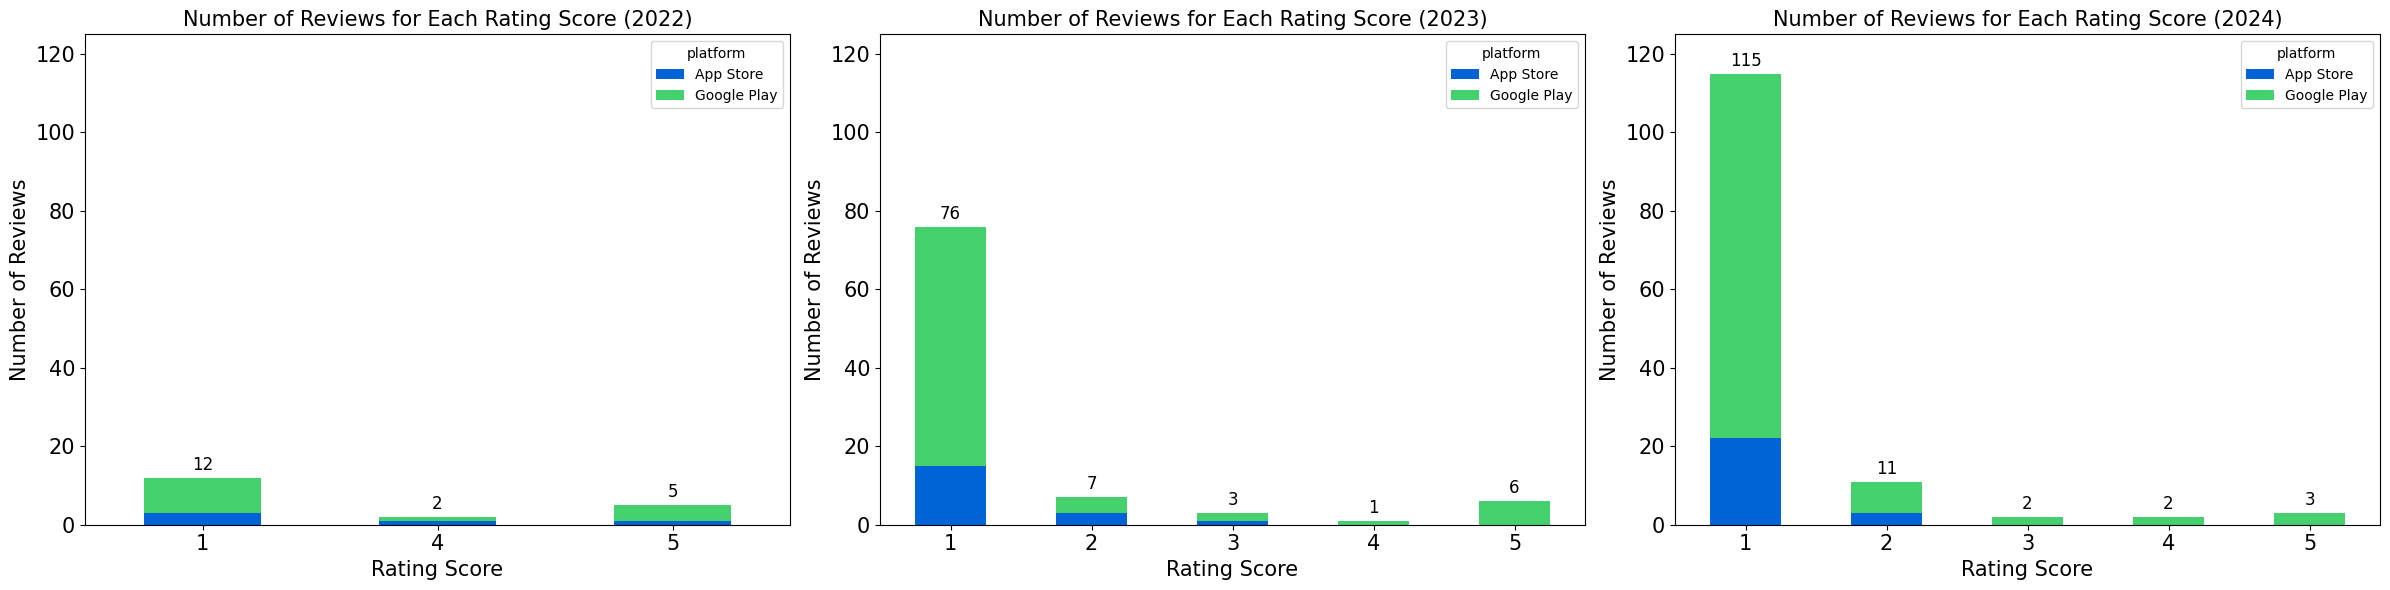

In [9]:
# Bar graphs for the number of reviews in the years 2022, 2023, and 2024


# Filter the DataFrame for the years 2022, 2023, and 2024
mb_2022 = pd.concat([mb_ggplay_df[mb_ggplay_df['at'].dt.year == 2022], mb_appstore_df[mb_appstore_df['at'].dt.year == 2022]], axis=0, ignore_index=True)
mb_2023 = pd.concat([mb_ggplay_df[mb_ggplay_df['at'].dt.year == 2023], mb_appstore_df[mb_appstore_df['at'].dt.year == 2023]], axis=0, ignore_index=True)
mb_2024 = pd.concat([mb_ggplay_df[mb_ggplay_df['at'].dt.year == 2024], mb_appstore_df[mb_appstore_df['at'].dt.year == 2024]], axis=0, ignore_index=True)

# Get the value counts for each score and platform for all three years
value_counts_2022 = mb_2022.groupby(['score', 'platform']).size().unstack(fill_value=0)
value_counts_2023 = mb_2023.groupby(['score', 'platform']).size().unstack(fill_value=0)
value_counts_2024 = mb_2024.groupby(['score', 'platform']).size().unstack(fill_value=0)

# Determine the maximum y-value to set the same y-axis limit
max_y = max(value_counts_2022.sum(axis=1).max(), value_counts_2023.sum(axis=1).max(), value_counts_2024.sum(axis=1).max()) + 5

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Define colors for platforms
colors = ['#0064D7', '#44D06D']

# Plot for 2022
value_counts_2022.plot(kind='bar', stacked=True, color=colors, ax=axs[0])
axs[0].set_title('Number of Reviews for Each Rating Score (2022)', fontsize=15)
axs[0].set_xlabel('Rating Score', fontsize=15)
axs[0].set_ylabel('Number of Reviews', fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].tick_params(axis='x', rotation=0)  # Rotate x-axis labels to vertical
axs[0].set_ylim(0, max_y + 5)  # Set the same y-axis limit for all plots

# Adding total labels on top of each stacked bar for 2022
totals_2022 = value_counts_2022.sum(axis=1)
for i, total in enumerate(totals_2022):
    axs[0].text(i, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=12)

# Plot for 2023
value_counts_2023.plot(kind='bar', stacked=True, color=colors, ax=axs[1])
axs[1].set_title('Number of Reviews for Each Rating Score (2023)', fontsize=15)
axs[1].set_xlabel('Rating Score', fontsize=15)
axs[1].set_ylabel('Number of Reviews', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='x', rotation=0) 
axs[1].set_ylim(0, max_y + 5)  # Set the same y-axis limit for all plots

# Adding total labels on top of each stacked bar for 2023
totals_2023 = value_counts_2023.sum(axis=1)
for i, total in enumerate(totals_2023):
    axs[1].text(i, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=12)

# Plot for 2024
value_counts_2024.plot(kind='bar', stacked=True, color=colors, ax=axs[2])
axs[2].set_title('Number of Reviews for Each Rating Score (2024)', fontsize=15)
axs[2].set_xlabel('Rating Score', fontsize=15)
axs[2].set_ylabel('Number of Reviews', fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)
axs[2].tick_params(axis='x', rotation=0) 
axs[2].set_ylim(0, max_y + 5)  # Set the same y-axis limit for all plots

# Adding total labels on top of each stacked bar for 2024
totals_2024 = value_counts_2024.sum(axis=1)
for i, total in enumerate(totals_2024):
    axs[2].text(i, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Bar graph for rating score (2024)

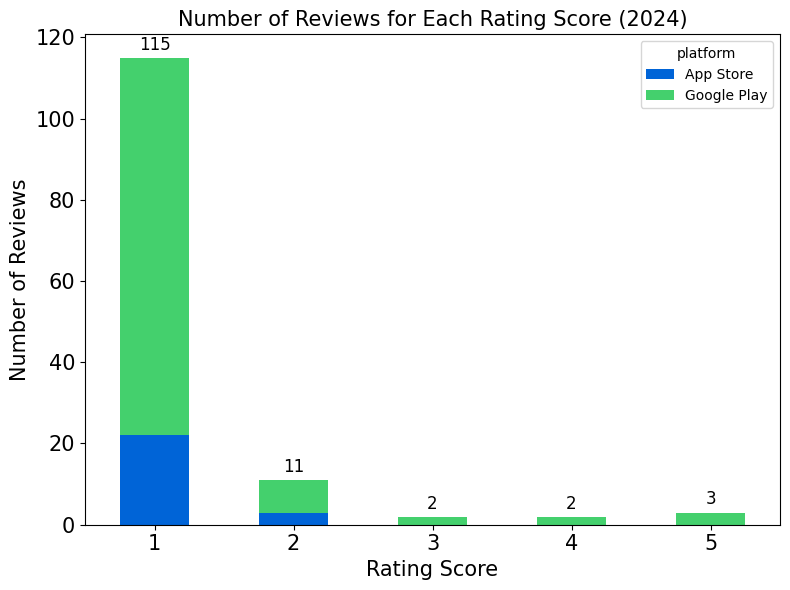

In [10]:
# Filter the DataFrame for the year 2024
mb_2024 = pd.concat([mb_ggplay_df[mb_ggplay_df['at'].dt.year == 2024], mb_appstore_df[mb_appstore_df['at'].dt.year == 2024]], axis=0, ignore_index=True)

# Get the value counts for each score and platform for 2024
value_counts_2024 = mb_2024.groupby(['score', 'platform']).size().unstack(fill_value=0)

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for platforms
colors = ['#0064D7', '#44D06D']

# Plot for 2024
value_counts_2024.plot(kind='bar', stacked=True, color=colors, ax=ax)
ax.set_title('Number of Reviews for Each Rating Score (2024)', fontsize=15)
ax.set_xlabel('Rating Score', fontsize=15)
ax.set_ylabel('Number of Reviews', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='x', rotation=0) 

# Adding total labels on top of each stacked bar for 2024
totals_2024 = value_counts_2024.sum(axis=1)
for i, total in enumerate(totals_2024):
    ax.text(i, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## Heatmap of Scores by Quarter (Google Play)

/var/folders/mb/9y6pxy613_x_ync4yzkhl_1m0000gn/T/ipykernel_73019/4008943041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_ggplay_df['at'] = pd.to_datetime(mb_ggplay_df['at'])
/var/folders/mb/9y6pxy613_x_ync4yzkhl_1m0000gn/T/ipykernel_73019/4008943041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_ggplay_df['year_quarter'] = mb_ggplay_df['at'].dt.to_period('Q')


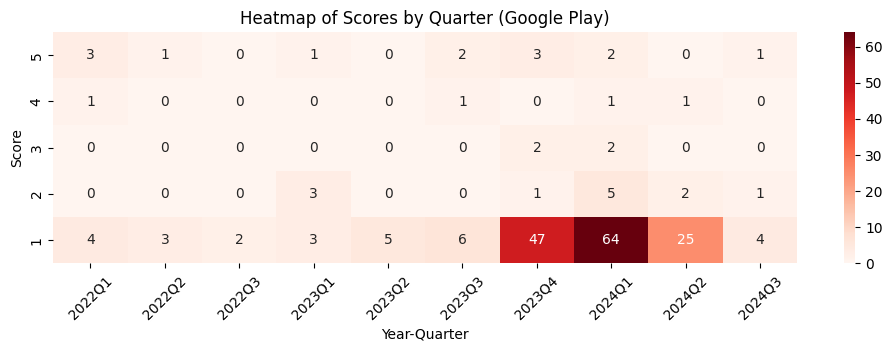

In [11]:
# Number of reviews for each score in each quarter

mb_ggplay_df['at'] = pd.to_datetime(mb_ggplay_df['at'])

# Create a year-quarter column
mb_ggplay_df['year_quarter'] = mb_ggplay_df['at'].dt.to_period('Q')

# Aggregate data to create a pivot table
review_quarter = mb_ggplay_df.pivot_table(index='score', columns='year_quarter', aggfunc='size', fill_value=0)

# Visualising the number of reviews for each score in each quarter

plt.figure(figsize=(12, 3))
ax = sns.heatmap(review_quarter, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Scores by Quarter (Google Play)')
plt.xlabel('Year-Quarter')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Reverse the y-axis
ax.invert_yaxis()

plt.show()

## Heatmap of Scores by Quarter (App Store)

/var/folders/mb/9y6pxy613_x_ync4yzkhl_1m0000gn/T/ipykernel_73019/2165167305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_appstore_df['at'] = pd.to_datetime(mb_appstore_df['at'])
/var/folders/mb/9y6pxy613_x_ync4yzkhl_1m0000gn/T/ipykernel_73019/2165167305.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_appstore_df['year_quarter'] = mb_appstore_df['at'].dt.to_period('Q')


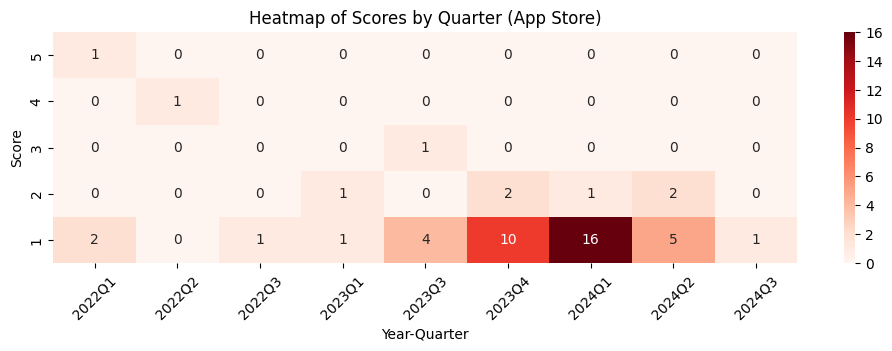

In [12]:
# Number of reviews for each score in each quarter

mb_appstore_df['at'] = pd.to_datetime(mb_appstore_df['at'])

# Create a year-quarter column
mb_appstore_df['year_quarter'] = mb_appstore_df['at'].dt.to_period('Q')

# Aggregate data to create a pivot table
review_quarter = mb_appstore_df.pivot_table(index='score', columns='year_quarter', aggfunc='size', fill_value=0)

# Visualising the number of reviews for each score in each quarter

plt.figure(figsize=(12, 3))
ax = sns.heatmap(review_quarter, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Scores by Quarter (App Store)')
plt.xlabel('Year-Quarter')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Reverse the y-axis
ax.invert_yaxis()

plt.show()

## Heatmap of Scores by App Version (Google Play)

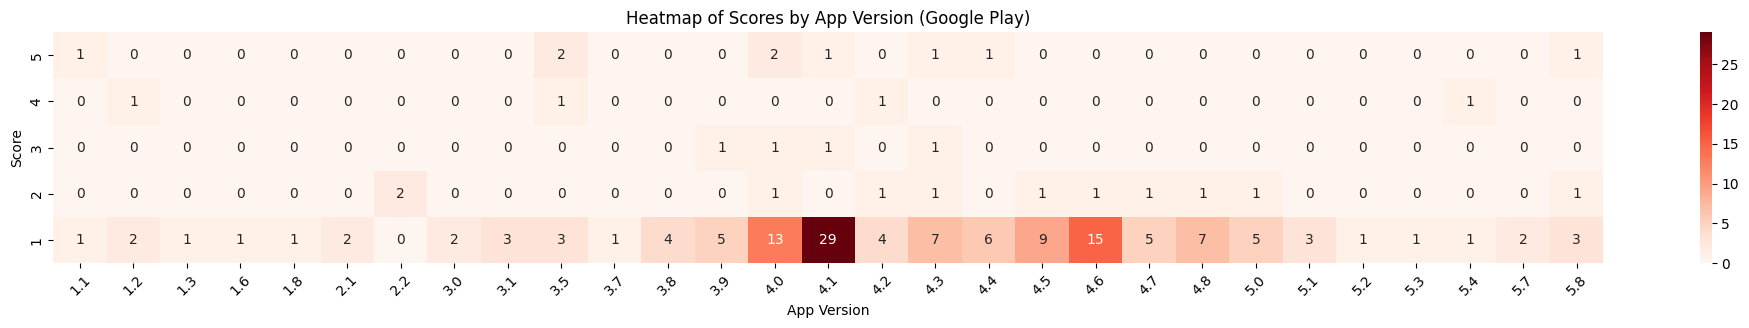

In [13]:
# Number of reviews for each score for each version

review_version = mb_ggplay_df.pivot_table(index='score', columns='appVersion', aggfunc='size', fill_value=0)

# Visualising the number of reviews for each score for each version

plt.figure(figsize=(25, 3))
ax = sns.heatmap(review_version, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Scores by App Version (Google Play)')
plt.xlabel('App Version')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Reverse the y-axis
ax.invert_yaxis()

plt.show()

In [14]:
# Data for scores by app version on appstore is not available

## Word Cloud for Reviews with Low Ratings (Google Play)

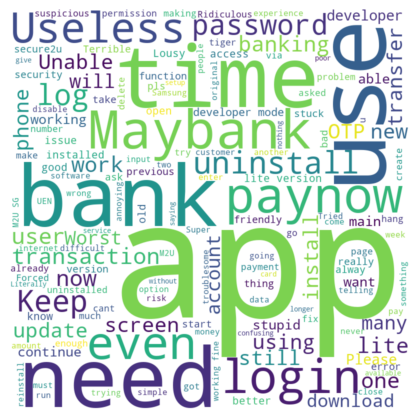

In [15]:
# Visualising the most frequent words appeared in the reviews with score <=3

text_ggplay = " ".join(review for review in mb_ggplay_df[mb_ggplay_df["score"]<=3]["content"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      max_words=150).generate(text_ggplay)

# Display the generated image:
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Frequently Appeared Words (Google Play)

In [16]:
# Tokenize the text
words = re.findall(r'\b\w+\b', text_ggplay.lower())

# Count frequency of each word
word_counts = Counter(words)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the word frequencies
print(word_freq_df[word_freq_df["Word"].str.len()>4].head(15))

          Word  Frequency
379    maybank         27
181     paynow         23
11      cannot         23
57       login         20
112      after         20
207      other         18
239    useless         18
317  uninstall         17
137   password         14
84   developer         14
227    version         13
65     banking         13
534    install         12
120      using         12
539    working         12


## Filter to fetch reviews contain specific word and rating (Google Play)

In [17]:
word_to_search = "developer"
scores_to_search = [1,2,3]

mb_ggplay_df[(mb_ggplay_df["score"].isin(scores_to_search))&(mb_ggplay_df["content"].str.contains(word_to_search,case=False))][['content','score','appVersion','at','platform']]

,content,score,appVersion,at,platform
7,Literally the worst banking app Keeps bugging ...,1,5.7,2024-06-27 19:46:20,Google Play
15,Can't use the bank app when I turn on develope...,1,5.1,2024-05-25 05:55:23,Google Play
32,Why must I disable my developer mode? What a u...,1,4.7,2024-04-02 20:07:53,Google Play
37,Why do I have to disable my developer mode on ...,1,4.6,2024-03-14 11:13:13,Google Play
45,Literally unusable because of developer option...,1,4.6,2024-03-07 17:59:50,Google Play
46,Stop forcing people to disable developer options,1,4.6,2024-03-07 00:11:23,Google Play
48,The new app is much lousier than the previous ...,2,4.6,2024-03-06 06:28:41,Google Play
49,Why do I have to disable Developer Mode? I nee...,1,4.6,2024-03-04 21:11:12,Google Play
53,"Useless app. Developer mode switched on, so no...",1,4.6,2024-03-01 15:36:28,Google Play
65,Y does verified apps or downloaded via trusted...,1,4.5,2024-02-27 07:25:20,Google Play


## Word Cloud for Reviews with Low Ratings (App Store)

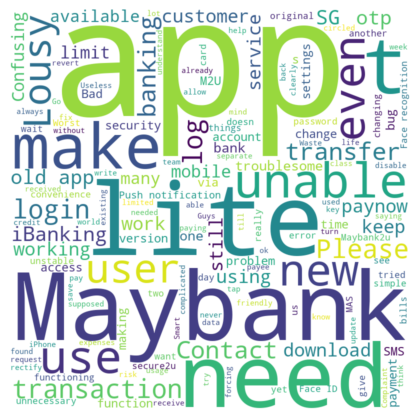

In [18]:
# Visualising the most frequent words appeared in the reviews with score <=3

text_appstore = " ".join(review for review in mb_appstore_df[mb_appstore_df["score"]<=3]["content"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      max_words=150).generate(text_appstore)

# Display the generated image:
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Frequently Appeared Words (App Store)¶

In [19]:
# Tokenize the text
words = re.findall(r'\b\w+\b', text_appstore.lower())

# Count frequency of each word
word_counts = Counter(words)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the word frequencies
print(word_freq_df[word_freq_df["Word"].str.len()>4].head(15))

         Word  Frequency
145   maybank         17
107    unable         13
36     cannot          9
95      lousy          8
189    please          8
270     login          7
53    banking          7
213  ibanking          7
87   transfer          7
90      after          7
57      using          6
112    paynow          6
381   working          6
248  download          6
123     still          6


## Filter to fetch reviews contain specific word and rating (App Store)

In [20]:
word_to_search = "paynow"
scores_to_search = [1,2,3]

mb_appstore_df[(mb_appstore_df["score"].isin(scores_to_search))&(mb_appstore_df["content"].str.contains(word_to_search,case=False))][['content','score','appVersion','at','platform']]

,content,score,appVersion,at,platform
199,"Lousy app and settings , Why does payment limi...",2,NaN,2024-03-04 11:30:38,App Store
204,"Worst iBanking Service , I’ve used SC and DBS ...",1,NaN,2024-03-15 11:50:05,App Store
207,"Worst banking app , Why need OTP after Face ID...",1,NaN,2024-05-25 00:34:44,App Store
231,"Why make 2 apps? , This app is not functioning...",1,NaN,2024-01-28 12:34:07,App Store
232,"Useless , Probably the only bank that needs a ...",1,NaN,2024-01-17 03:46:13,App Store
243,"Wtf , Ask to download LITE app. After download...",1,NaN,2023-12-13 13:52:45,App Store
